# Pass Rate Trend Analysis
## Analyzing Document Check and Facial Similarity Check Results Over Time

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')

# Load the datasets
doc_check_df = pd.read_csv('Data/Document-check-report.csv')
facial_check_df = pd.read_csv('Data/Facial-similarity-check-report.csv')

print(f"Document Check Records: {len(doc_check_df):,}")
print(f"Facial Check Records: {len(facial_check_df):,}")

Document Check Records: 176,404
Facial Check Records: 176,404


In [2]:
# Convert created_at to datetime
doc_check_df['created_at'] = pd.to_datetime(doc_check_df['created_at'])
facial_check_df['created_at'] = pd.to_datetime(facial_check_df['created_at'])

# Extract year-month for grouping
doc_check_df['year_month'] = doc_check_df['created_at'].dt.to_period('M')
facial_check_df['year_month'] = facial_check_df['created_at'].dt.to_period('M')

# Check date range
print("Document Check Date Range:")
print(f"  From: {doc_check_df['created_at'].min()}")
print(f"  To: {doc_check_df['created_at'].max()}")
print(f"\nFacial Check Date Range:")
print(f"  From: {facial_check_df['created_at'].min()}")
print(f"  To: {facial_check_df['created_at'].max()}")

Document Check Date Range:
  From: 2021-05-23 15:13:02+00:00
  To: 2021-10-31 23:54:24+00:00

Facial Check Date Range:
  From: 2021-05-23 15:13:02+00:00
  To: 2021-10-31 23:54:24+00:00


In [3]:
# Check unique values for result columns
print("Document Check 'result' values:")
print(doc_check_df['result'].value_counts())
print(f"\nFacial Check 'result_facial' values:")
print(facial_check_df['result_facial'].value_counts())

Document Check 'result' values:
result
clear       132402
consider     44002
Name: count, dtype: int64

Facial Check 'result_facial' values:
result_facial
clear       165486
consider     10917
Name: count, dtype: int64


In [4]:
# Calculate monthly statistics for Document Check
doc_monthly = doc_check_df.groupby('year_month').agg(
    total_checks=('result', 'count'),
    clear_count=('result', lambda x: (x == 'clear').sum()),
    consider_count=('result', lambda x: (x == 'consider').sum())
).reset_index()

doc_monthly['pass_rate'] = (doc_monthly['clear_count'] / doc_monthly['total_checks']) * 100
doc_monthly['fail_rate'] = (doc_monthly['consider_count'] / doc_monthly['total_checks']) * 100
doc_monthly['year_month_dt'] = doc_monthly['year_month'].dt.to_timestamp()

print("Document Check Monthly Summary:")
print(doc_monthly.to_string(index=False))

Document Check Monthly Summary:
year_month  total_checks  clear_count  consider_count  pass_rate  fail_rate year_month_dt
   2021-05          1739         1608             131  92.466935   7.533065    2021-05-01
   2021-06          8276         8003             273  96.701305   3.298695    2021-06-01
   2021-07         33998        30272            3726  89.040532  10.959468    2021-07-01
   2021-08         36840        30911            5929  83.906080  16.093920    2021-08-01
   2021-09         37594        27329           10265  72.695111  27.304889    2021-09-01
   2021-10         57957        34279           23678  59.145573  40.854427    2021-10-01


In [5]:
# Calculate monthly statistics for Facial Check
facial_monthly = facial_check_df.groupby('year_month').agg(
    total_checks=('result_facial', 'count'),
    clear_count=('result_facial', lambda x: (x == 'clear').sum()),
    consider_count=('result_facial', lambda x: (x == 'consider').sum())
).reset_index()

facial_monthly['pass_rate'] = (facial_monthly['clear_count'] / facial_monthly['total_checks']) * 100
facial_monthly['fail_rate'] = (facial_monthly['consider_count'] / facial_monthly['total_checks']) * 100
facial_monthly['year_month_dt'] = facial_monthly['year_month'].dt.to_timestamp()

print("Facial Check Monthly Summary:")
print(facial_monthly.to_string(index=False))

Facial Check Monthly Summary:
year_month  total_checks  clear_count  consider_count  pass_rate  fail_rate year_month_dt
   2021-05          1739         1515             224  87.119034  12.880966    2021-05-01
   2021-06          8276         7829             447  94.598840   5.401160    2021-06-01
   2021-07         33998        31264            2734  91.958350   8.041650    2021-07-01
   2021-08         36839        33733            3106  91.568718   8.431282    2021-08-01
   2021-09         37594        35416            2178  94.206522   5.793478    2021-09-01
   2021-10         57957        55729            2228  96.155771   3.844229    2021-10-01


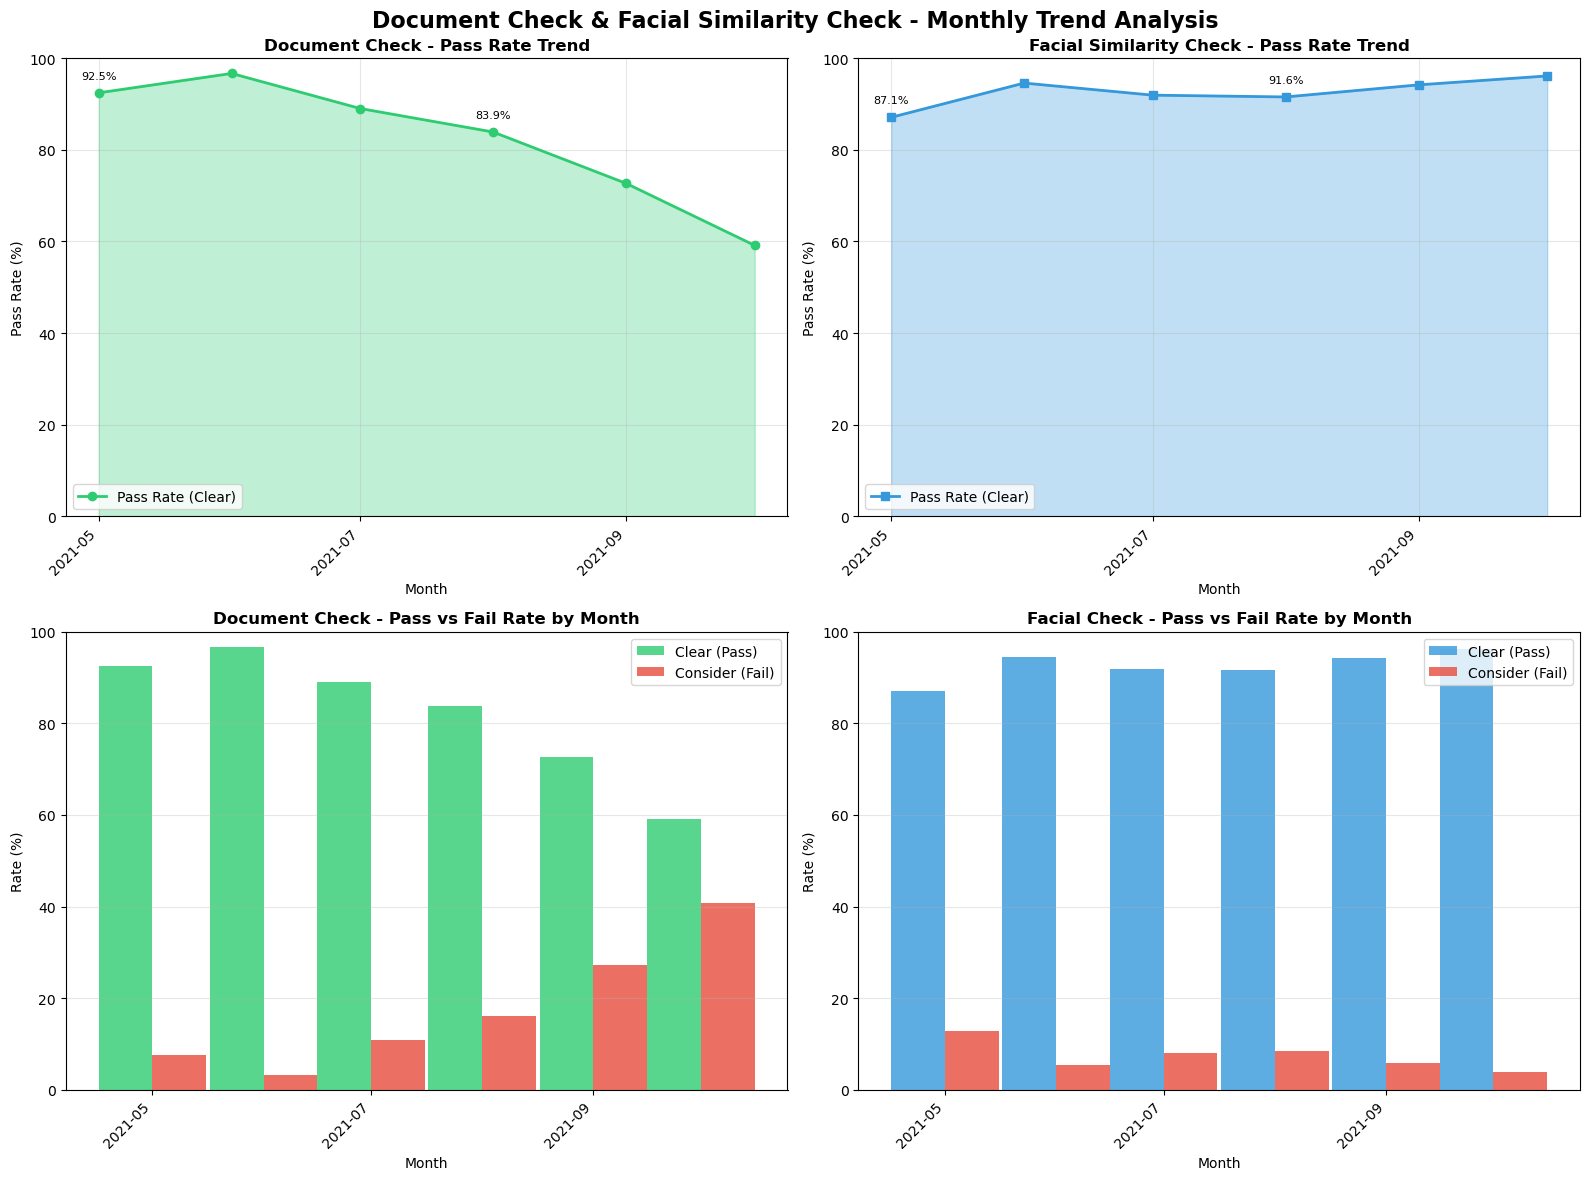


✅ Chart saved as 'pass_rate_trend_analysis.png'


In [6]:
# Create visualization: Pass Rate Trends Over Months
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Document Check & Facial Similarity Check - Monthly Trend Analysis', fontsize=16, fontweight='bold')

# Plot 1: Document Check Pass Rate Trend
ax1 = axes[0, 0]
ax1.plot(doc_monthly['year_month_dt'], doc_monthly['pass_rate'], marker='o', linewidth=2, 
         color='#2ecc71', markersize=6, label='Pass Rate (Clear)')
ax1.fill_between(doc_monthly['year_month_dt'], doc_monthly['pass_rate'], alpha=0.3, color='#2ecc71')
ax1.set_title('Document Check - Pass Rate Trend', fontsize=12, fontweight='bold')
ax1.set_xlabel('Month', fontsize=10)
ax1.set_ylabel('Pass Rate (%)', fontsize=10)
ax1.set_ylim(0, 100)
ax1.grid(True, alpha=0.3)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')
ax1.legend(loc='lower left')

# Add trend line annotation
for i, (x, y) in enumerate(zip(doc_monthly['year_month_dt'], doc_monthly['pass_rate'])):
    if i % 3 == 0:  # Annotate every 3rd point
        ax1.annotate(f'{y:.1f}%', (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8)

# Plot 2: Facial Check Pass Rate Trend
ax2 = axes[0, 1]
ax2.plot(facial_monthly['year_month_dt'], facial_monthly['pass_rate'], marker='s', linewidth=2, 
         color='#3498db', markersize=6, label='Pass Rate (Clear)')
ax2.fill_between(facial_monthly['year_month_dt'], facial_monthly['pass_rate'], alpha=0.3, color='#3498db')
ax2.set_title('Facial Similarity Check - Pass Rate Trend', fontsize=12, fontweight='bold')
ax2.set_xlabel('Month', fontsize=10)
ax2.set_ylabel('Pass Rate (%)', fontsize=10)
ax2.set_ylim(0, 100)
ax2.grid(True, alpha=0.3)
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')
ax2.legend(loc='lower left')

for i, (x, y) in enumerate(zip(facial_monthly['year_month_dt'], facial_monthly['pass_rate'])):
    if i % 3 == 0:
        ax2.annotate(f'{y:.1f}%', (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8)

# Plot 3: Combined Pass/Fail Rate for Document Check
ax3 = axes[1, 0]
width = 15  # width in days
x_dates = doc_monthly['year_month_dt']
ax3.bar(x_dates - pd.Timedelta(days=width/2), doc_monthly['pass_rate'], width=width, 
        label='Clear (Pass)', color='#2ecc71', alpha=0.8)
ax3.bar(x_dates + pd.Timedelta(days=width/2), doc_monthly['fail_rate'], width=width, 
        label='Consider (Fail)', color='#e74c3c', alpha=0.8)
ax3.set_title('Document Check - Pass vs Fail Rate by Month', fontsize=12, fontweight='bold')
ax3.set_xlabel('Month', fontsize=10)
ax3.set_ylabel('Rate (%)', fontsize=10)
ax3.set_ylim(0, 100)
ax3.grid(True, alpha=0.3, axis='y')
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax3.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45, ha='right')
ax3.legend()

# Plot 4: Combined Pass/Fail Rate for Facial Check
ax4 = axes[1, 1]
x_dates = facial_monthly['year_month_dt']
ax4.bar(x_dates - pd.Timedelta(days=width/2), facial_monthly['pass_rate'], width=width, 
        label='Clear (Pass)', color='#3498db', alpha=0.8)
ax4.bar(x_dates + pd.Timedelta(days=width/2), facial_monthly['fail_rate'], width=width, 
        label='Consider (Fail)', color='#e74c3c', alpha=0.8)
ax4.set_title('Facial Check - Pass vs Fail Rate by Month', fontsize=12, fontweight='bold')
ax4.set_xlabel('Month', fontsize=10)
ax4.set_ylabel('Rate (%)', fontsize=10)
ax4.set_ylim(0, 100)
ax4.grid(True, alpha=0.3, axis='y')
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax4.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45, ha='right')
ax4.legend()

plt.tight_layout()
plt.savefig('pass_rate_trend_analysis.png', dpi=150, bbox_inches='tight')
plt.show()
print("\n✅ Chart saved as 'pass_rate_trend_analysis.png'")

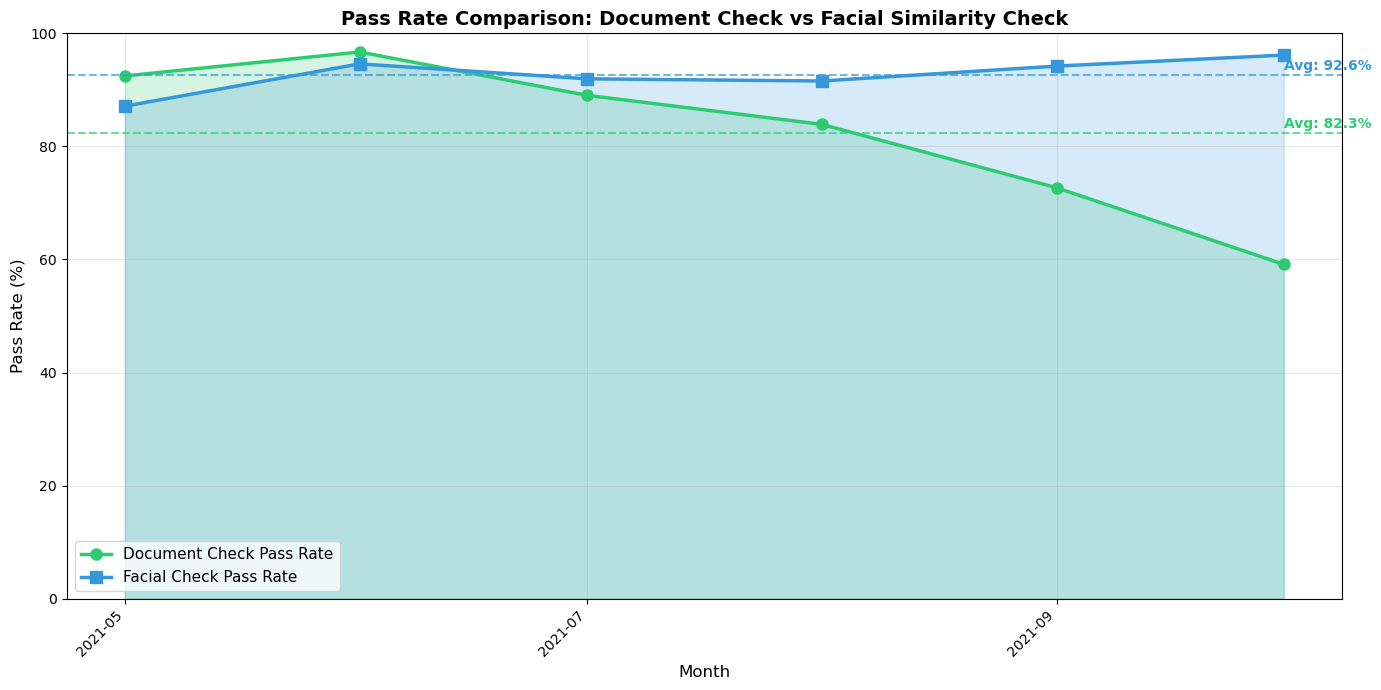


✅ Chart saved as 'pass_rate_comparison.png'


In [7]:
# Create comparison visualization: Both Check Types on Same Chart
fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(doc_monthly['year_month_dt'], doc_monthly['pass_rate'], marker='o', linewidth=2.5, 
        color='#2ecc71', markersize=8, label='Document Check Pass Rate')
ax.plot(facial_monthly['year_month_dt'], facial_monthly['pass_rate'], marker='s', linewidth=2.5, 
        color='#3498db', markersize=8, label='Facial Check Pass Rate')

ax.fill_between(doc_monthly['year_month_dt'], doc_monthly['pass_rate'], alpha=0.2, color='#2ecc71')
ax.fill_between(facial_monthly['year_month_dt'], facial_monthly['pass_rate'], alpha=0.2, color='#3498db')

ax.set_title('Pass Rate Comparison: Document Check vs Facial Similarity Check', fontsize=14, fontweight='bold')
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Pass Rate (%)', fontsize=12)
ax.set_ylim(0, 100)
ax.grid(True, alpha=0.3)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
ax.legend(loc='lower left', fontsize=11)

# Add average lines
avg_doc = doc_monthly['pass_rate'].mean()
avg_facial = facial_monthly['pass_rate'].mean()
ax.axhline(y=avg_doc, color='#2ecc71', linestyle='--', alpha=0.7, label=f'Avg Doc: {avg_doc:.1f}%')
ax.axhline(y=avg_facial, color='#3498db', linestyle='--', alpha=0.7, label=f'Avg Facial: {avg_facial:.1f}%')

# Add text for averages
ax.text(doc_monthly['year_month_dt'].iloc[-1], avg_doc + 1, f'Avg: {avg_doc:.1f}%', 
        color='#2ecc71', fontweight='bold', fontsize=10)
ax.text(facial_monthly['year_month_dt'].iloc[-1], avg_facial + 1, f'Avg: {avg_facial:.1f}%', 
        color='#3498db', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.savefig('pass_rate_comparison.png', dpi=150, bbox_inches='tight')
plt.show()
print("\n✅ Chart saved as 'pass_rate_comparison.png'")

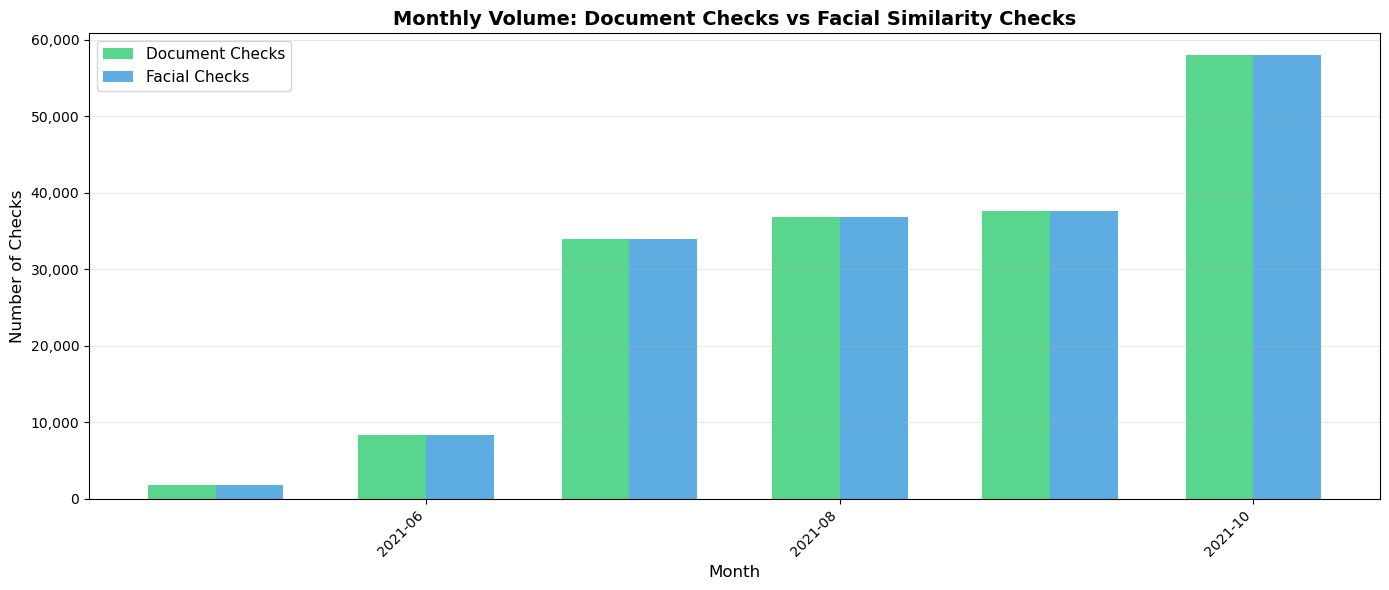


✅ Chart saved as 'monthly_volume.png'


In [8]:
# Volume Analysis: Number of checks per month
fig, ax = plt.subplots(figsize=(14, 6))

width = 10
x_dates = doc_monthly['year_month_dt']
ax.bar(x_dates - pd.Timedelta(days=width/2), doc_monthly['total_checks'], width=width, 
       label='Document Checks', color='#2ecc71', alpha=0.8)
ax.bar(x_dates + pd.Timedelta(days=width/2), facial_monthly['total_checks'], width=width, 
       label='Facial Checks', color='#3498db', alpha=0.8)

ax.set_title('Monthly Volume: Document Checks vs Facial Similarity Checks', fontsize=14, fontweight='bold')
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Number of Checks', fontsize=12)
ax.grid(True, alpha=0.3, axis='y')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
ax.legend(fontsize=11)

# Format y-axis with commas
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.tight_layout()
plt.savefig('monthly_volume.png', dpi=150, bbox_inches='tight')
plt.show()
print("\n✅ Chart saved as 'monthly_volume.png'")

In [9]:
# Summary Statistics
print("=" * 70)
print("SUMMARY STATISTICS")
print("=" * 70)

print("\n📄 DOCUMENT CHECK RESULTS:")
print(f"   Total Checks: {doc_monthly['total_checks'].sum():,}")
print(f"   Overall Pass Rate: {(doc_monthly['clear_count'].sum() / doc_monthly['total_checks'].sum() * 100):.2f}%")
print(f"   Monthly Pass Rate Range: {doc_monthly['pass_rate'].min():.2f}% - {doc_monthly['pass_rate'].max():.2f}%")
print(f"   Average Monthly Pass Rate: {doc_monthly['pass_rate'].mean():.2f}%")

# Trend calculation
first_half = doc_monthly['pass_rate'].iloc[:len(doc_monthly)//2].mean()
second_half = doc_monthly['pass_rate'].iloc[len(doc_monthly)//2:].mean()
trend_doc = "📈 IMPROVING" if second_half > first_half else "📉 DECLINING"
print(f"   Trend (First Half vs Second Half): {trend_doc} ({first_half:.1f}% → {second_half:.1f}%)")

print("\n👤 FACIAL SIMILARITY CHECK RESULTS:")
print(f"   Total Checks: {facial_monthly['total_checks'].sum():,}")
print(f"   Overall Pass Rate: {(facial_monthly['clear_count'].sum() / facial_monthly['total_checks'].sum() * 100):.2f}%")
print(f"   Monthly Pass Rate Range: {facial_monthly['pass_rate'].min():.2f}% - {facial_monthly['pass_rate'].max():.2f}%")
print(f"   Average Monthly Pass Rate: {facial_monthly['pass_rate'].mean():.2f}%")

# Trend calculation
first_half_facial = facial_monthly['pass_rate'].iloc[:len(facial_monthly)//2].mean()
second_half_facial = facial_monthly['pass_rate'].iloc[len(facial_monthly)//2:].mean()
trend_facial = "📈 IMPROVING" if second_half_facial > first_half_facial else "📉 DECLINING"
print(f"   Trend (First Half vs Second Half): {trend_facial} ({first_half_facial:.1f}% → {second_half_facial:.1f}%)")

print("\n" + "=" * 70)

SUMMARY STATISTICS

📄 DOCUMENT CHECK RESULTS:
   Total Checks: 176,404
   Overall Pass Rate: 75.06%
   Monthly Pass Rate Range: 59.15% - 96.70%
   Average Monthly Pass Rate: 82.33%
   Trend (First Half vs Second Half): 📉 DECLINING (92.7% → 71.9%)

👤 FACIAL SIMILARITY CHECK RESULTS:
   Total Checks: 176,403
   Overall Pass Rate: 93.81%
   Monthly Pass Rate Range: 87.12% - 96.16%
   Average Monthly Pass Rate: 92.60%
   Trend (First Half vs Second Half): 📈 IMPROVING (91.2% → 94.0%)

